In [21]:
%store -r X_train_80 y_train_80 X_test_20 y_test_20
X_train_80 = X_train_80
y_train_80 = y_train_80

X_test_20 = X_test_20
y_test_20 = y_test_20

# Extra: Random Forest vs Artificial Neural Network

## Random Forest Classifier
Random forests are an ensemble learning method for classification and regression that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

## Training : Simple Random Forest

### Plot the results
Let's define a simple function to plot the results of the training and validation accuracy vs the number of trees in the forest.

In [22]:
import matplotlib.pyplot as plt

def plot_nOftrees_and_acc(number_of_trees, train_accuracies, val_accuracies):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(number_of_trees, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(number_of_trees, val_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Accuracy vs. Number of Trees')
    plt.legend()
    plt.show()

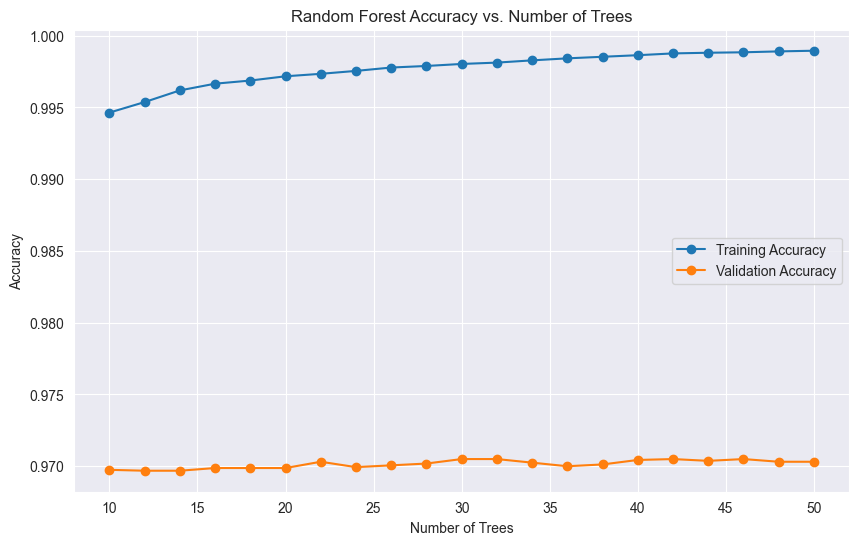

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Divid the training set into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_80, y_train_80, test_size=0.2, random_state=42)


# List to save the results
train_accuracies = []
val_accuracies = []
number_of_trees = [x for x in range(10,51,2)]
forests_dic = {}
# Try different numbers of trees in the Random Forest
for i in range(10,51,2):
    random_forest = RandomForestClassifier(n_estimators=i, random_state=42)
    random_forest.fit(X_train, y_train)
    
    # Compute the training accuracy
    train_accuracy = random_forest.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Compute the validation accuracy
    val_accuracy = random_forest.score(X_val, y_val)
    val_accuracies.append(val_accuracy)
    
    forests_dic[i] = random_forest

# Plot the results
plot_nOftrees_and_acc(number_of_trees, train_accuracies, val_accuracies)

### How many trees?
The number of trees in the forest is a hyperparameter that controls the complexity of the model. The more trees in the forest, the more complex the model becomes. However, adding more trees to the forest makes the model slower and can lead to overfitting. Therefore, it is necessary to find an optimal number of trees that minimizes the error on the test set.

We can see that the validation accuracy increase very slowly, and tend to be stable. So we can choose 20 as the number of trees in our model.


In [24]:
rf = forests_dic[20]

## Training : Balanced Random Forest
Fortunately, imblearn provides a BalancedRandomForestClassifier that is an extension of the scikit-learn RandomForestClassifier. 
A balanced random forest differs from a classical random forest by the fact that it will draw a bootstrap sample from the minority class and sample with replacement **the same number of samples** from the majority class.

for more information: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

The class weight parameter can be : balanced, balanced_subsample, or a dictionary of weights. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
 The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

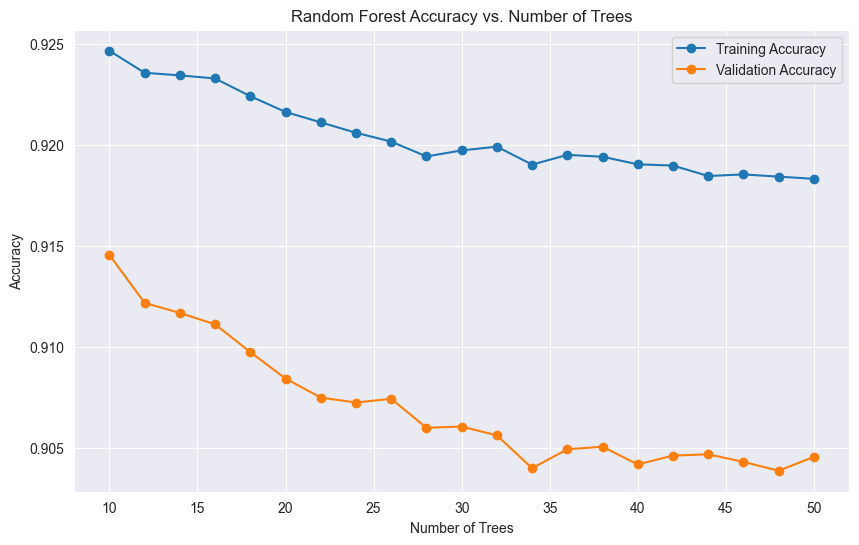

In [25]:
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt

# List to save the results
train_accuracies = []
val_accuracies = []
balanced_forests_dic = {}
number_of_trees = [x for x in range(10,51,2)]
# Try different numbers of trees in the Random Forest
for i in range(10,51,2):
    random_forest = BalancedRandomForestClassifier(n_estimators=i,class_weight='balanced_subsample', random_state=42, bootstrap=True, sampling_strategy='auto', replacement=False)
    random_forest.fit(X_train, y_train) 
    
    # Compute the training accuracy
    train_accuracy = random_forest.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Compute the validation accuracy
    val_accuracy = random_forest.score(X_val, y_val)
    val_accuracies.append(val_accuracy)
    
    balanced_forests_dic[i] = random_forest

plot_nOftrees_and_acc(number_of_trees, train_accuracies, val_accuracies)

In [26]:
balanced_rf = balanced_forests_dic[10]

## Test : Comparison Unbalanced vs Balanced

In [27]:
from utility_functions import evaluate_classification_models


Classification Report - Model 1:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Classification Report - Model 2:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18300
           1       0.48      0.89      0.62      1700

    accuracy                           0.91     20000
   macro avg       0.73      0.90      0.78     20000
weighted avg       0.95      0.91      0.92     20000


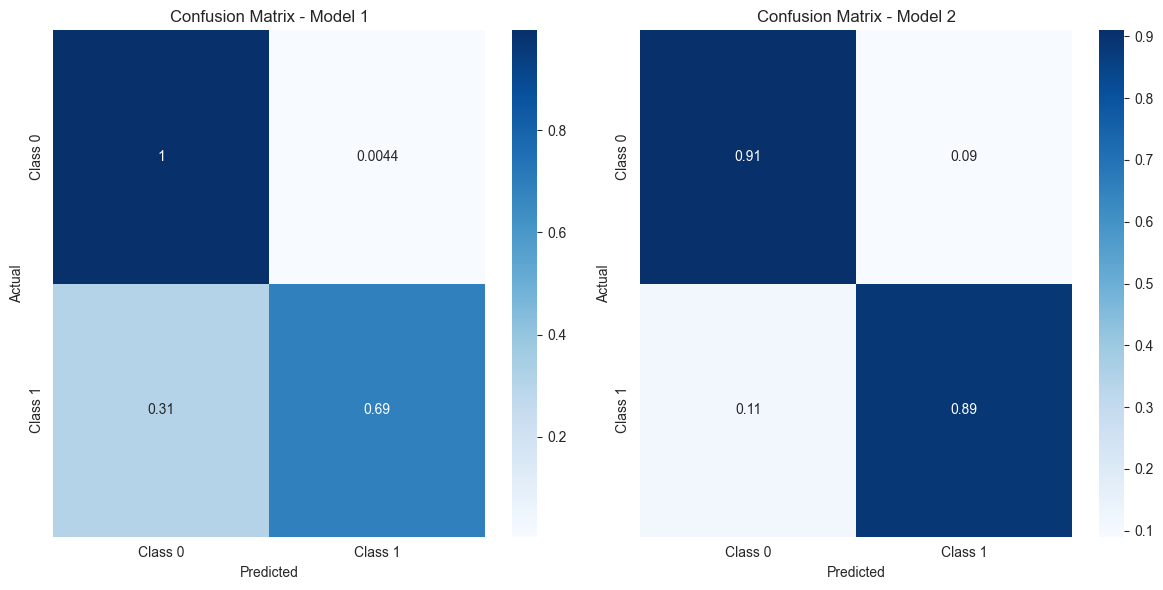

In [28]:
models = [rf, balanced_rf] # model1, model2
evaluate_classification_models(models, X_test_20, y_test_20, normalize_param='true')

### Considerations
Looking at the confusion matrix, seems that the Balanced Random Forest shift the predictions in order to capture more positive samples. This is a good thing, since we are more interested in the positive samples than the negative ones. 
 

As previously highlighted, the decision to balance the classes does not always translate into the optimal choice.


## Comparison with the Neural Network
I'll compare the simple neural network with the unbalanced random forest and the weighted neural network with the balanced random forest.

### Load the model

In [29]:
from tensorflow.keras.models import load_model

simple_model = load_model('simple_model')
weighted_model = load_model('weighted_model')

models = [simple_model, rf, weighted_model, balanced_rf ] # model1, model2, model3, model4


### Evaluate the models on the test set

625/625 [==============================] - 1s 1ms/step

Classification Report - Model 1:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       1.00      0.66      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Classification Report - Model 2:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000
625/625 [==============================] - 1s 881us/step

Classification Report - Model 3:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18300
           1       0.46  

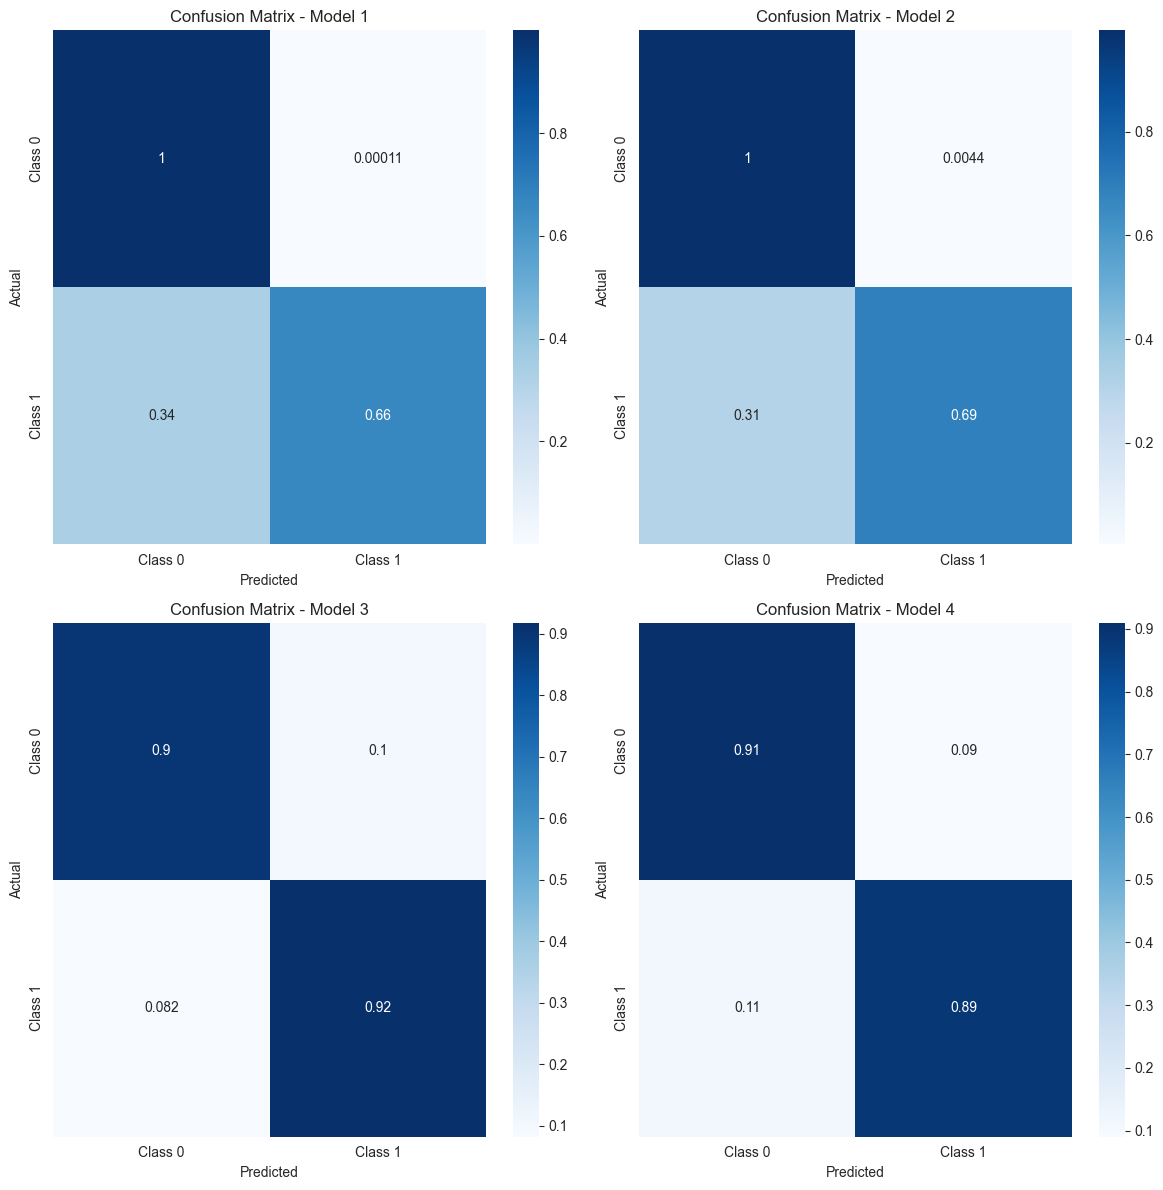

In [30]:
evaluate_classification_models(models, X_test_20, y_test_20, normalize_param='true')

## Conclusion
It's interesting to see that the random forest is performing almost as well as the neural network in both cases. This result can be considered as further evidence of the validity of the neural network's structure.


In the context of tabular data, training a random forest might be preferable since it requires fewer computational resources.


# References
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html
